In [4]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from scipy.spatial import distance
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import cos_similarity_btw_s1_s2_plot
from similarities import metric_similarity_btw_s1_s2_plot
from similarities import time_cos_similarity_plot




We explore the time similarity of the Schnmidt states

In [16]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

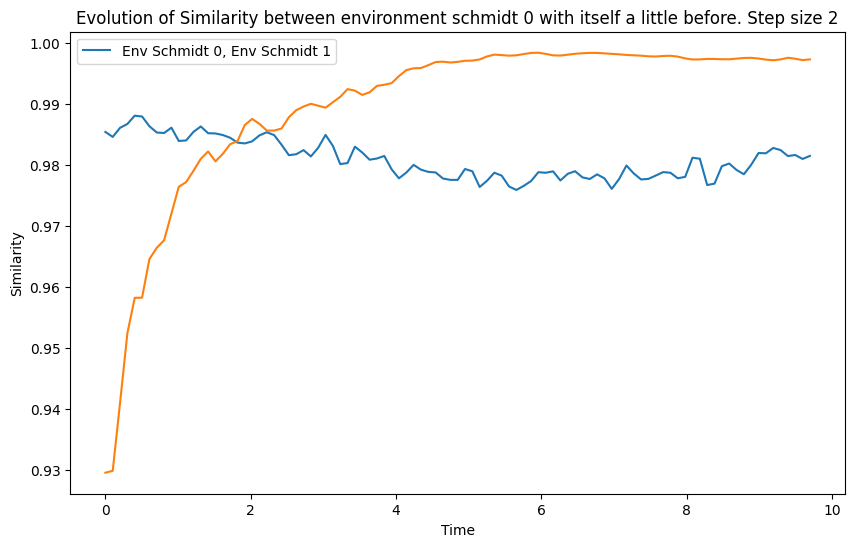

In [17]:
time_cos_similarity_plot(result,tlist)

Note that we only look at the environment Schmidt state. Maybe we should look at the full schmidt state? since the system state does vary in time (ie, it goes from superposition of 2 eigenstates, to just one eigenstate of the system)

Very weirdly, the 2 states have very difference behavior.


In [18]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

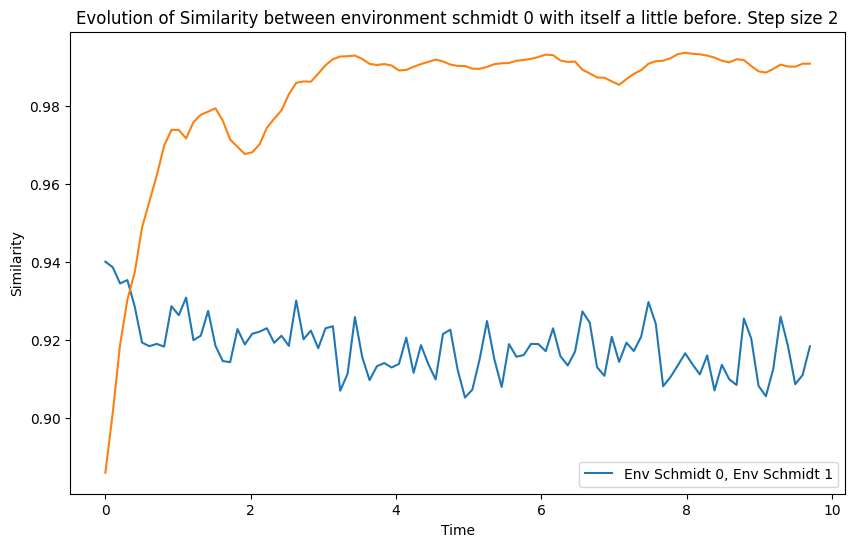

In [19]:
time_cos_similarity_plot(result,tlist)

In [20]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

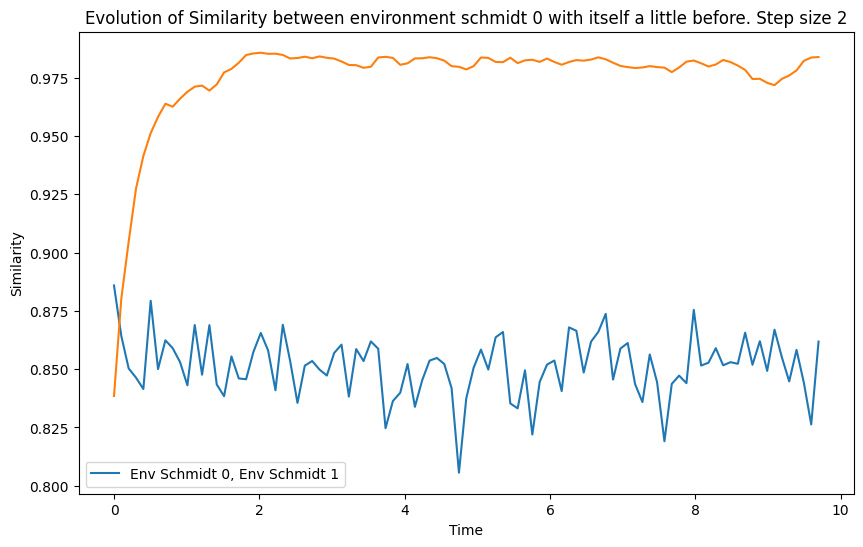

In [21]:
time_cos_similarity_plot(result,tlist)

In [22]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.15
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

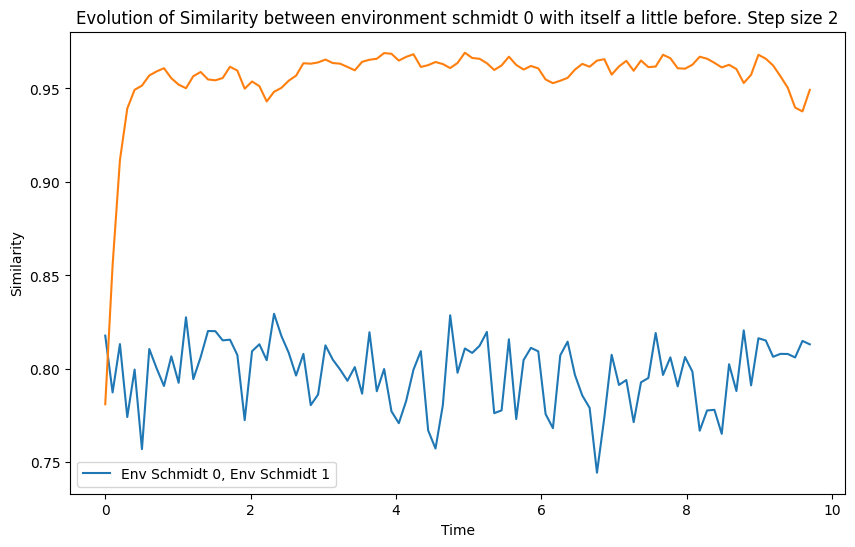

In [23]:
time_cos_similarity_plot(result,tlist)

We see smoother lines for lower interaction energy, and as expected ther reach equilibirum faster for higher energies.

The difference in smoothness of the curves is due to w and q, it changes it changes the effective interaction energy.

Note, this is more a measure of fluctuation

We also note that the higher the energy, the less similar in time the schmidt states start. I think, this is simply because, the more interaction we have, the they will vary. So the baseline, itself is not very interesting, just a measure of EI.

We observe that Schmidt 1 has a slight downward trend to a lower fluctuation speed as time goes (it quickly reaches equilibrium). What characterizes this "amount of fluctuation"??? Can I try to minimize it? 
We want to have states that start in high fluctutation, and evolve to states that fluctuat less.
-We know that w will change the effective interaction energy, resulting in different smoothness.
-




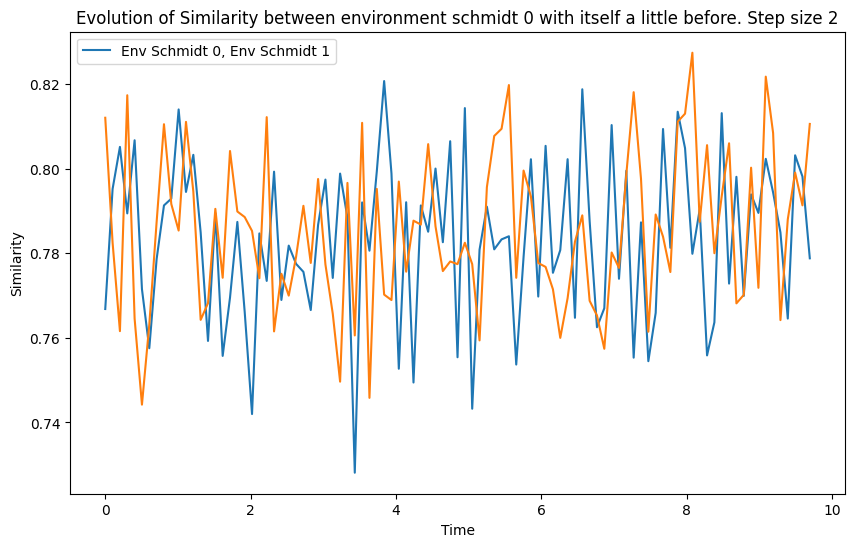

In [27]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
time_cos_similarity_plot(result,tlist)

We now look at the Schmidt 1 to Schmidt 2 similarity.

In [35]:

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)


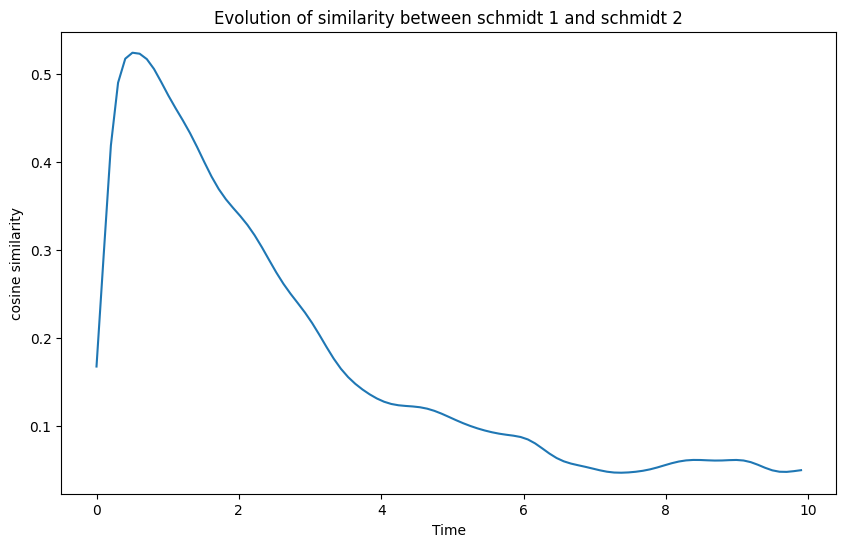

In [36]:
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

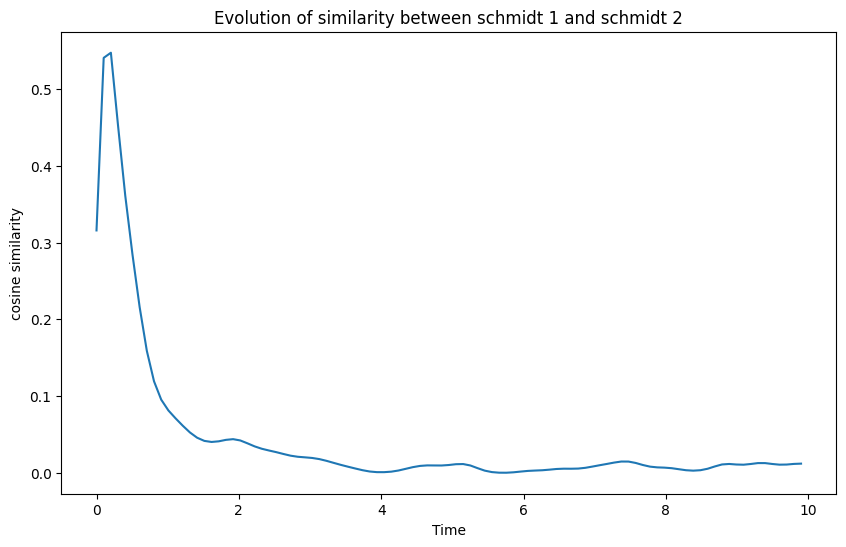

In [37]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

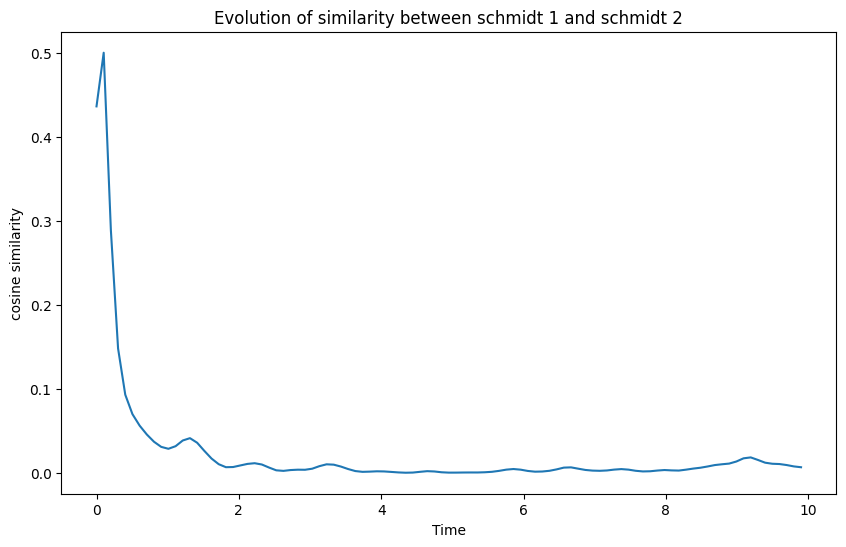

In [38]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.09
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

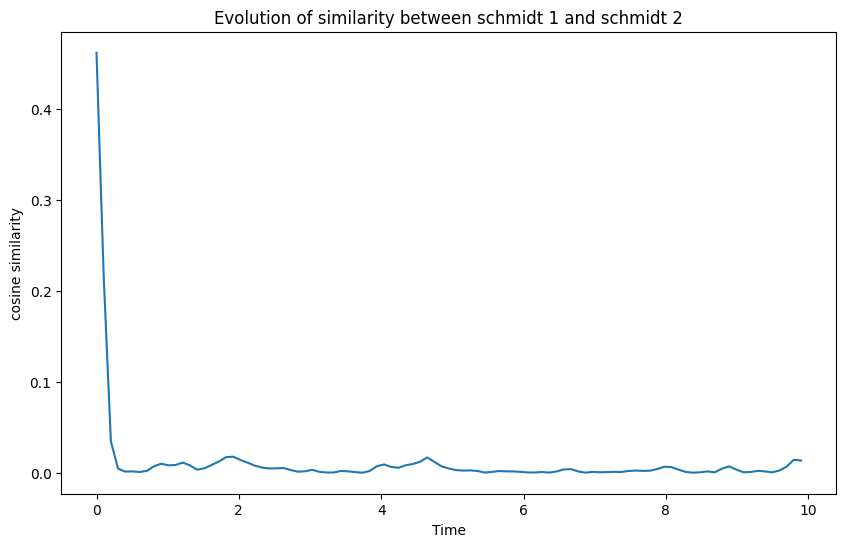

In [39]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.15
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

We see an initial increase in similarity, before a decrease that takes a longer time for lower interaction strengths.

We dont really see a change in how low or high the similarities go

This can be compared to the gifs where we see the distribution for schmidt 1 start already in a peaked form get a bit sharper and just fluctuate a bit. The distrib of schmidt 2 starts spread out and gets sharper with a shape not exactly that at schmidt 1 (dep on w and q).

So there may be an effect where the drastic change of schmidt 2 to a shape like schmidt 1 makes the simimlarity peak, before even though the shape stays similar, the schmidts become different...

We now look at the impact of w

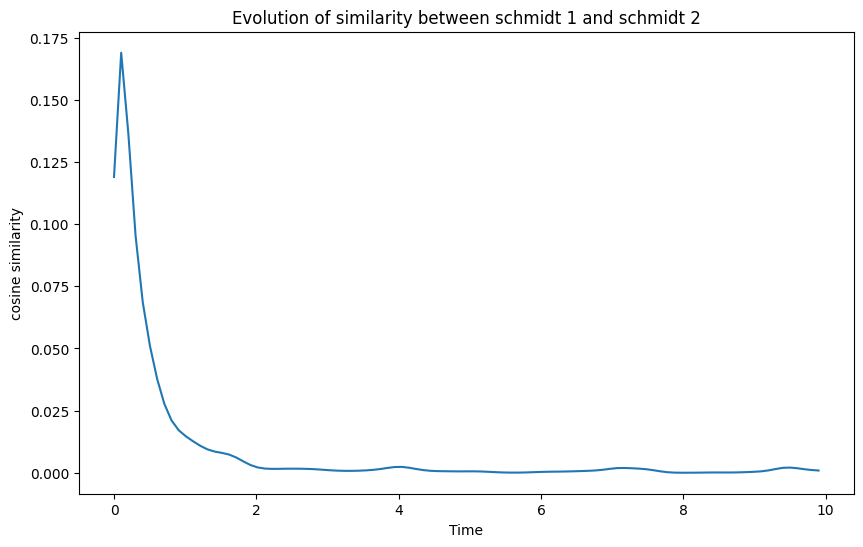

In [40]:
d1, d2 = 10, 200
w = 0.1
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

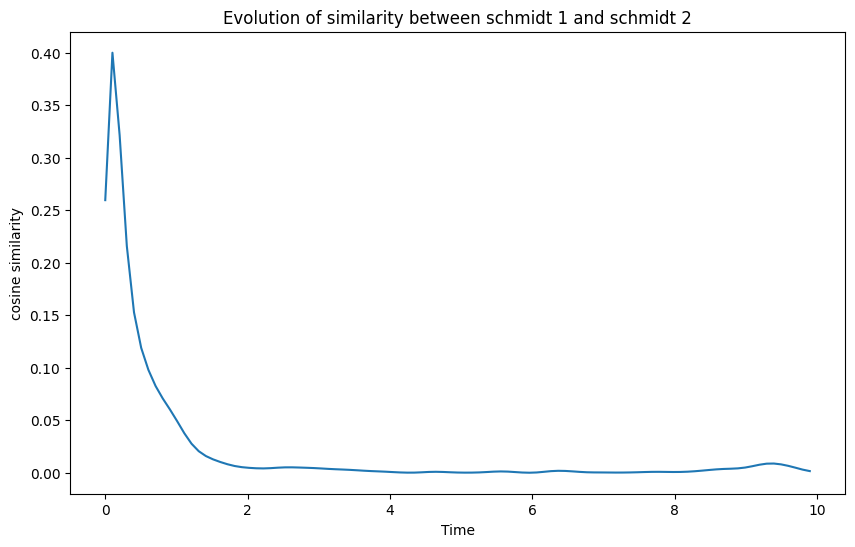

In [41]:
d1, d2 = 10, 200
w = 0.2
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

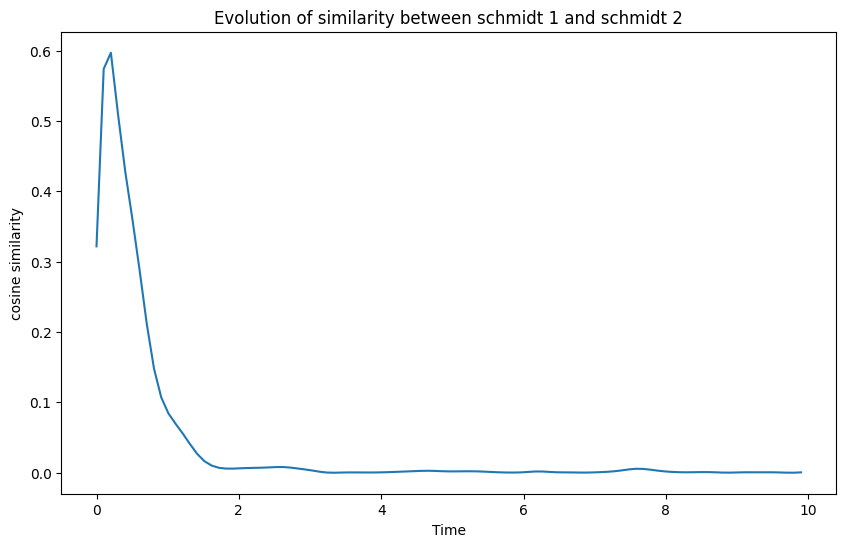

In [42]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

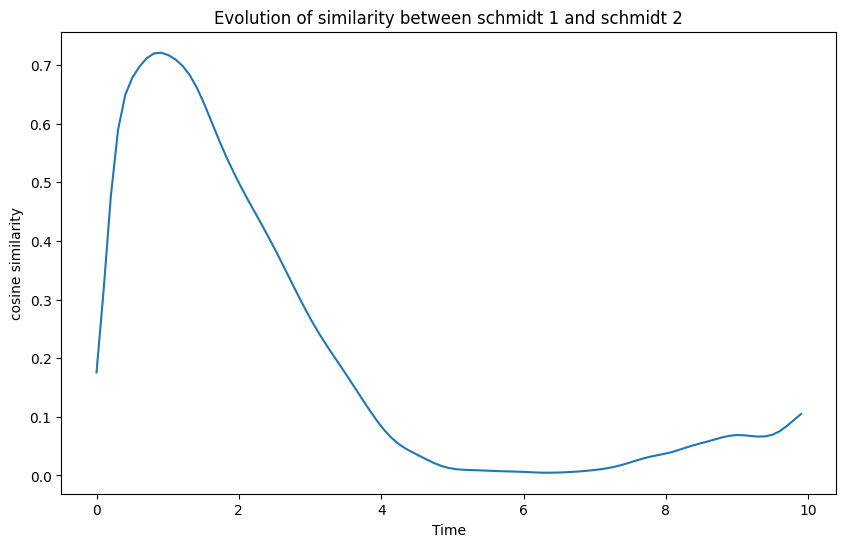

In [47]:
d1, d2 = 10, 200
w = 0.4
E_spacing = 1.0
Int_strength = 0.03
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

We have the effect that the higher w is, the higher the initial hump is.

The higher w is the more similar the interaction strength with the environemnt is. This may explain it. We can test this theory by also changing E_spacing. We expect that a large E_spacing makes the max smaller.


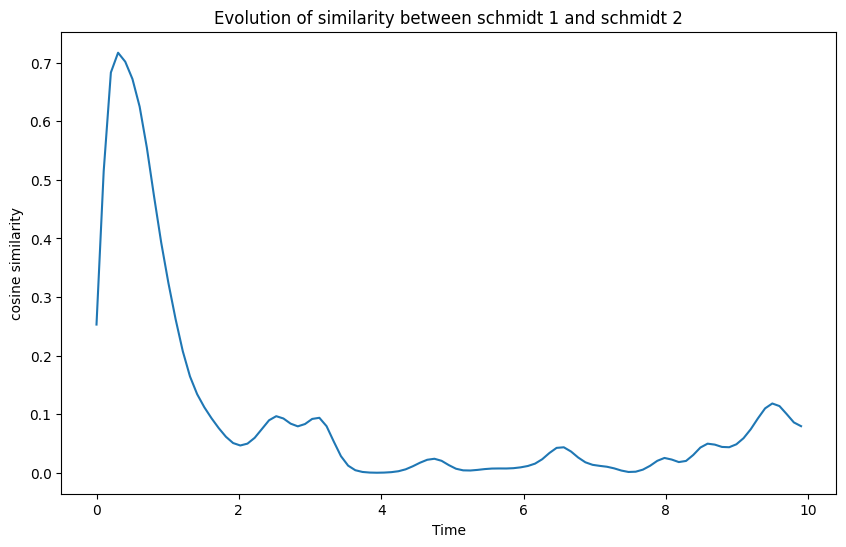

In [49]:
d1, d2 = 10, 200
w = 0.4
E_spacing = 2.0
Int_strength = 0.03
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

Result is no. Annoyingly changing E_spacing makes the effectiv interaction strength higher, so the peak smaller. 

In [ ]:

def probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,EI,w)



def cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)


def metric_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

time_cos_similarity_plot(result,tlist)
